# EDA

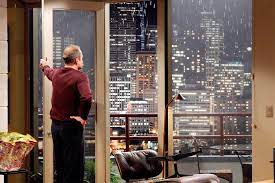

In [20]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
# importing the data from the data folder
df = pd.read_csv("data/eda_joint_tables.csv")


In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   id             21597 non-null  int64  
 4   id.1           21597 non-null  int64  
 5   bedrooms       21597 non-null  float64
 6   bathrooms      21597 non-null  float64
 7   sqft_living    21597 non-null  float64
 8   sqft_lot       21597 non-null  float64
 9   floors         21597 non-null  float64
 10  waterfront     19206 non-null  float64
 11  view           21534 non-null  float64
 12  condition      21597 non-null  int64  
 13  grade          21597 non-null  int64  
 14  sqft_above     21597 non-null  float64
 15  sqft_basement  21145 non-null  float64
 16  yr_built       21597 non-null  int64  
 17  yr_renovated   17749 non-null  float64
 18  zipcod

,date,price,house_id,id,id.1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,1,7129300520,3.000,1.000,1180.000,5650.000,1.000,...,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,2,6414100192,3.000,2.250,2570.000,7242.000,2.000,...,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,3,5631500400,2.000,1.000,770.000,10000.000,1.000,...,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4,2487200875,4.000,3.000,1960.000,5000.000,1.000,...,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,5,1954400510,3.000,2.000,1680.000,8080.000,1.000,...,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000


In [52]:
import missingno as msno

In [53]:
df.isnull().sum()

date                0
price               0
house_id            0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

<Axes: >

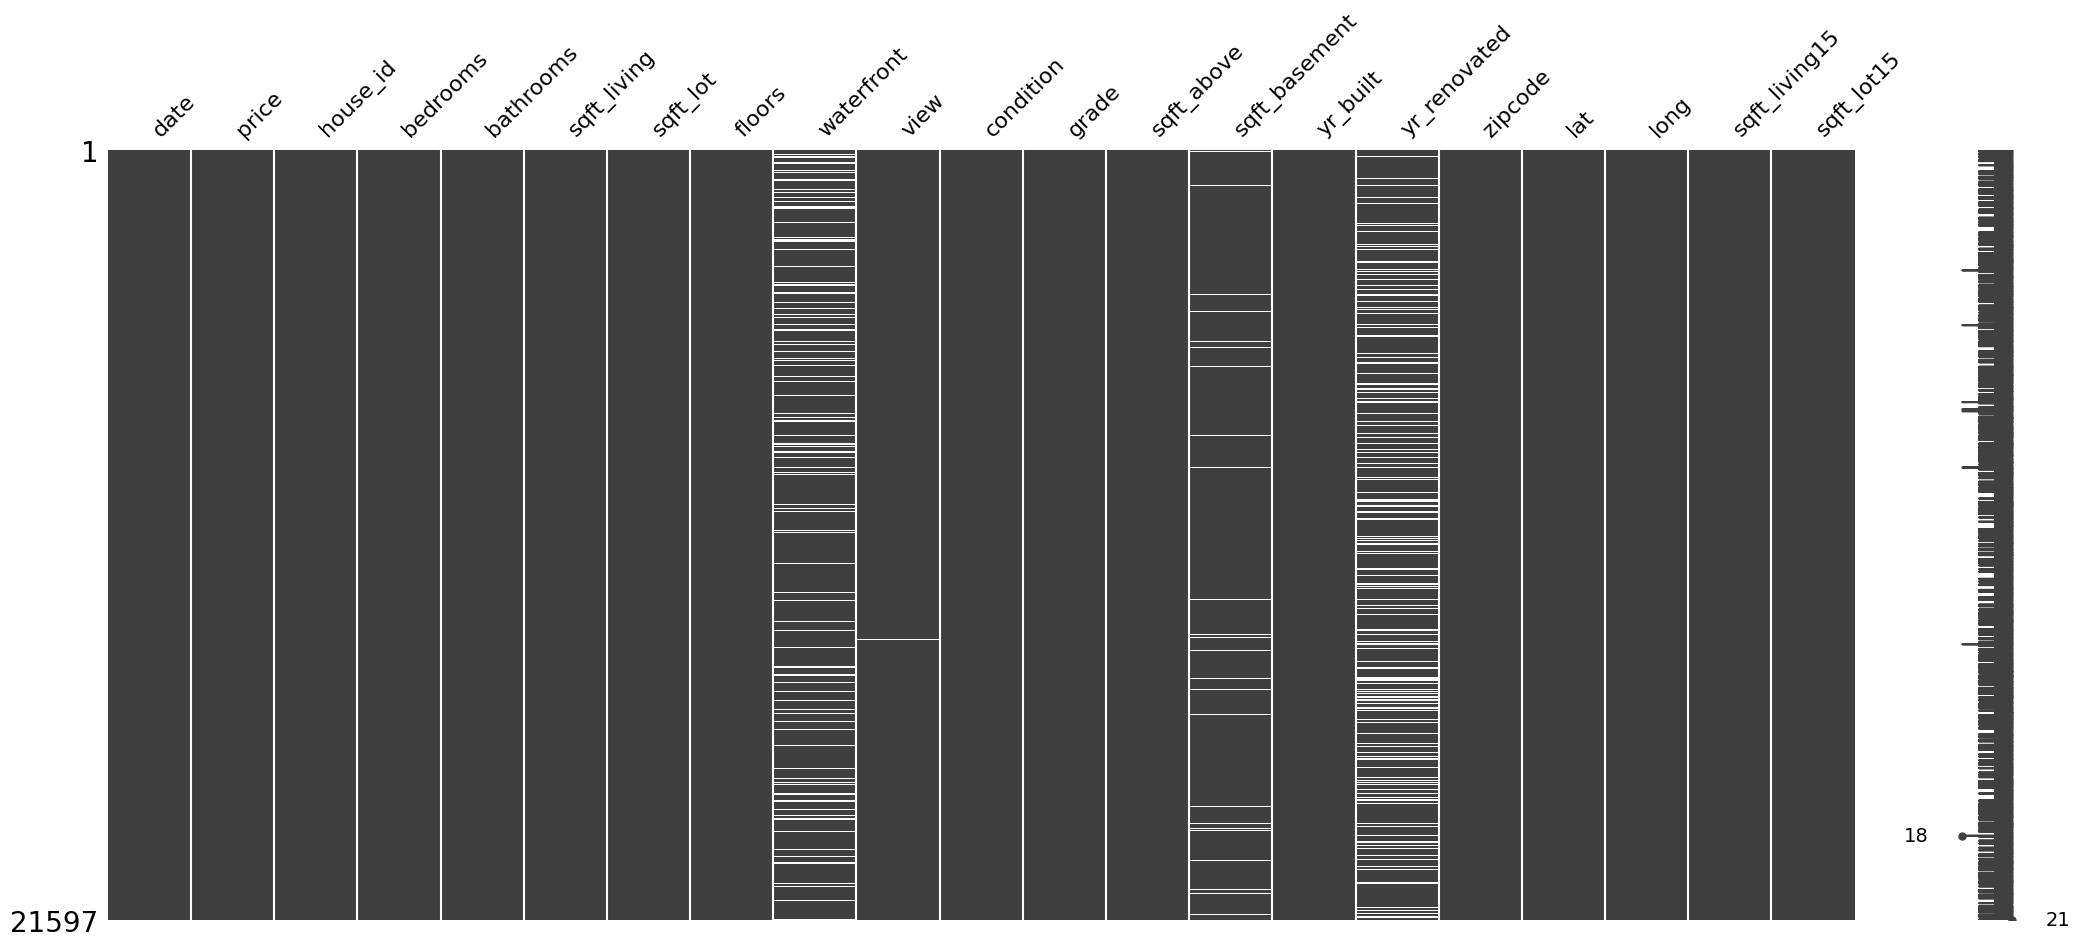

In [54]:
msno.matrix(df)

In [56]:
df['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [5]:
#dropping the columns that are not needed for the analysis
df.drop(columns=['id', 'id.1'],axis=1 ,inplace=True)
df.head()

,date,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900.000,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,...,7,1180.000,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000
1,2014-12-09,538000.000,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,...,7,2170.000,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000
2,2015-02-25,180000.000,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,...,6,770.000,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000
3,2014-12-09,604000.000,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,...,7,1050.000,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000
4,2015-02-18,510000.000,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,...,8,1680.000,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000


In [66]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [112]:
df.waterfront.nunique()

2

<BarContainer object of 5 artists>

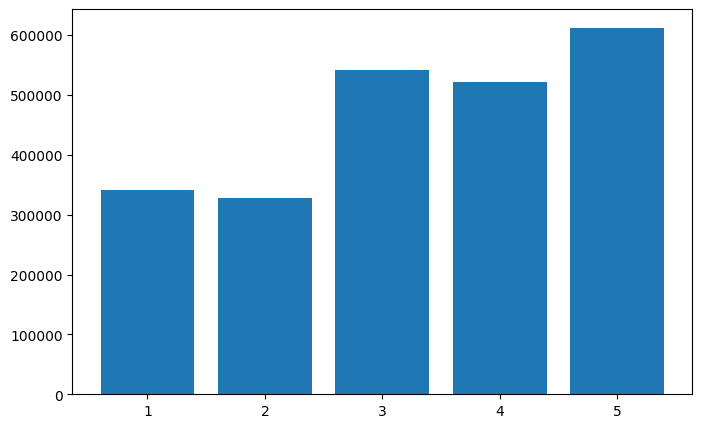

In [67]:
#testing ho the condition correlates with the price
test1 = df.groupby('condition', as_index=False).mean('price')
test1.head()
plt.bar(test1['condition'], test1['price'])

<BarContainer object of 11 artists>

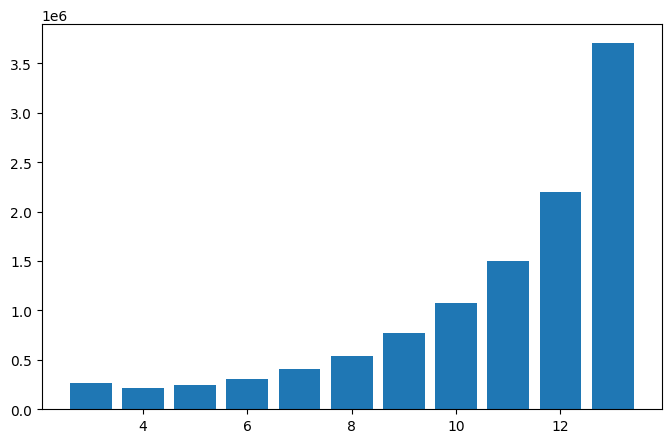

In [68]:
#testing how the grade correlates with the price
test2 = df.groupby('grade', as_index=False).mean('price')
plt.bar(test2['grade'], test2['price'])

<BarContainer object of 70 artists>

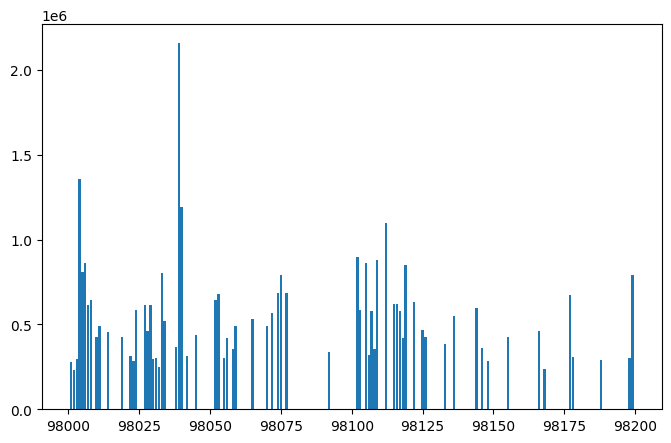

In [69]:
#testing how the zipcode correlates with the price
test3 = df.groupby('zipcode', as_index=False).mean('price')
plt.bar(test3['zipcode'], test3['price'])

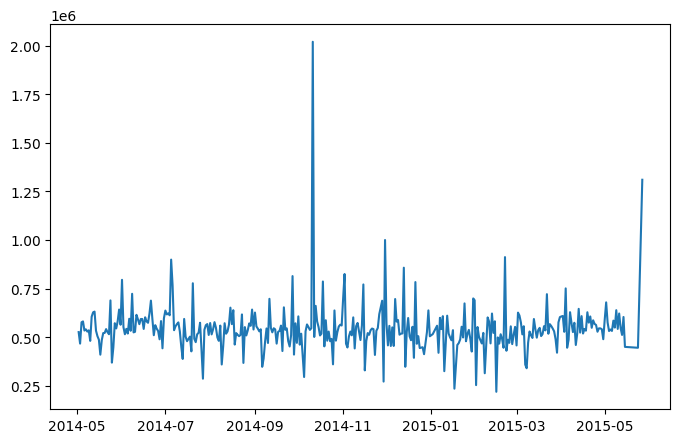

In [ ]:

test4 = df.groupby('date', as_index=False).mean('price')
#plt.plot(test4['date'], test4['price'])

In [108]:
alt.data_transformers.enable("json")

# Read in polygons from topojson
map = alt.topo_feature('data/washington.geojson', feature='map')

chart_scale = 400
long_trans = 100
lat_trans = 100	
#, scale = chart_scale, translate=[long_trans, lat_trans]

# State of Washington in the background
background = alt.Chart(map).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    width=500,
    height=300
).project(
    type = 'mercator'
).properties(
    width=500,
    height=300
).interactive()

# Create a scatter plot of the data
points = alt.Chart(df).mark_circle().encode(
    longitude='long:Q',
    latitude='lat:Q',
    color= 'zipcode:N',
    size=alt.value(10),
    tooltip='price:Q'
    ).project(
    type = 'mercator'
).properties(
    width=500,
    height=300
).interactive()

chart = background + points
chart

alt.LayerChart(...)

In [110]:
test5 = df.sort_values(by='price', ascending=False).head(2160)

alt.data_transformers.enable("json")

# Read in polygons from topojson
map = alt.topo_feature('data/washington.geojson', feature='map')

chart_scale = 400
long_trans = 100
lat_trans = 100	
#, scale = chart_scale, translate=[long_trans, lat_trans]

# State of Washington in the background
background = alt.Chart(map).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    width=500,
    height=300
).project(
    type = 'mercator'
).properties(
    width=500,
    height=300
).interactive()

# Create a scatter plot of the data
points = alt.Chart(test5).mark_circle().encode(
    longitude='long:Q',
    latitude='lat:Q',
    color= 'zipcode:N',
    size=alt.value(10),
    tooltip='price:Q'
    ).project(
    type = 'mercator'
).properties(
    width=500,
    height=300
).interactive()

chart = background + points
chart

alt.LayerChart(...)

In [59]:
points = alt.Chart(df).mark_circle().encode(
    longitude='long',
    latitude='lat',
    color= 'zipcode',
    size=alt.value(10),
    tooltip='zipcode'
    ).project(
    type = 'mercator').interactive()

points

alt.Chart(...)